<a href="https://www.kaggle.com/code/josemariamartin/mrr-ejecucionpresupuestaria-2022?scriptVersionId=100588279" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Ejecución presupuestaria MRR (Mayo 2022)

In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import re

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
!pip install openpyxl

/kaggle/input/ejecucionpresupuestaria-mayo/MENSUAL MAYO 2022 (EXCEL).xlsx


In [22]:
fileEP_202205 = '../input/ejecucionpresupuestaria-mayo/MENSUAL MAYO 2022 (EXCEL).xlsx'
# for pandas version >= 0.21.0
xls = pd.ExcelFile(fileEP_202205)

In [23]:
filtro = '.*C[0-9][0-9]\.I[0-9][0-9].*'
totalMedida = pd.DataFrame()
Medida = pd.DataFrame()
for sheet_name in xls.sheet_names:
    if 'MRR' in sheet_name:
        df = pd.read_excel(xls, sheet_name, header=[1,2],index_col=[0])
        Medida = df.filter(regex=filtro, axis=0)
        if not Medida.empty:
            aplicacion =''
            #for aplicacion in Comp.index:
            for aplicacion, row in Medida.iterrows():
                strMedida = 'C[0-9][0-9]\.I[0-9][0-9]'
                try:
                    medida = re.search(strMedida,aplicacion).group(0)
                    componente = medida[0:3]
                    politica = aplicacion[0:aplicacion.find(medida)-1]
                    ministerio = sheet_name[-2:]+'-'+Medida.axes[1].names[0].split("\n")[1]
                except AttributeError:
                    medida = ''
                    componente = ''
                    politica = ''
                    ministerio = ''
                    pass
                if type(row.values[2]) is str:
                    definitivos = 0
                else:
                    definitivos = row.values[2]
                    
                if type(row.values[3]) is str:
                    autorizados = 0
                else:
                    autorizados = row.values[3]
                    
                if type(row.values[4]) is str:
                    comprometidos = 0
                else:
                    comprometidos = row.values[4]
                    
                if type(row.values[5]) is str:
                    reconocidos = 0
                else:
                    reconocidos = row.values[5]
                    
                if type(row.values[6]) is str:
                    pagados = 0
                else:
                    pagados = row.values[6]
                    
                if definitivos > 0:
                    porcRealizado = reconocidos/definitivos * 100

                    
                fila = pd.DataFrame([[ministerio,componente,medida, politica,definitivos, autorizados, comprometidos, reconocidos,pagados, porcRealizado]],
                                    columns=['Ministerio','Componente','Medida','Politica', 'Definitivos','Autorizados','Comprometidos','Reconocidos','Pagados','%Realizado'])
                totalMedida = totalMedida.append(fila)

            #print(Comp)

print(totalMedida)

                                         Ministerio Componente   Medida  \
0   12-ASUNTOS EXTERIORES, U. EUROPEA Y COOPERACIÓN        C11  C11.I02   
0                                       13-JUSTICIA        C11  C11.I02   
0                                       13-JUSTICIA        C11  C11.I04   
0                                        14-DEFENSA        C11  C11.I02   
0                                        14-DEFENSA        C19  C19.I03   
..                                              ...        ...      ...   
0      32-INCLUSIÓN, SEGURIDAD SOCIAL Y MIGRACIONES        C22  C22.I05   
0      32-INCLUSIÓN, SEGURIDAD SOCIAL Y MIGRACIONES        C23  C23.I07   
0      32-INCLUSIÓN, SEGURIDAD SOCIAL Y MIGRACIONES        C11  C11.I02   
0                                  33-UNIVERSIDADES        C21  C21.I04   
0                                  33-UNIVERSIDADES        C21  C21.I05   

   Politica  Definitivos  Autorizados  Comprometidos  Reconocidos  Pagados  \
0      14KB      7877

In [24]:
totalMedida.head()

,Ministerio,Componente,Medida,Politica,Definitivos,Autorizados,Comprometidos,Reconocidos,Pagados,%Realizado
0,"12-ASUNTOS EXTERIORES, U. EUROPEA Y COOPERACIÓN",C11,C11.I02,14KB,78776.0,66095,66095,0,0,0.000000
0,13-JUSTICIA,C11,C11.I02,11KB,199502.0,19626,12069,483,483,0.242103
0,13-JUSTICIA,C11,C11.I04,42KD,9509.0,3685,3685,0,0,0.000000
0,14-DEFENSA,C11,C11.I02,12KB,33422.0,23162,22922,9830,9830,29.411765
0,14-DEFENSA,C19,C19.I03,12SC,3000.0,2000,2000,0,0,0.000000


In [25]:
#pd.options.display.max_rows = None

columns_to_show = ['Definitivos','Autorizados','Comprometidos','Reconocidos','Pagados','%Realizado']
totalMedida.groupby(['Componente','Medida','Politica'])[columns_to_show].sum().sort_values('%Realizado', ascending=False)

Definitivos  Autorizados  Comprometidos  \
Componente Medida  Politica                                            
C02        C02.I02 26BB         500000.0       500000         500000   
C11        C11.I02 11KB         208149.0        27913          18856   
C06        C06.I01 45FA         635437.0       635437         635437   
C01        C01.I03 45AC         615422.0       615422         615422   
C14        C14.I01 43NA        1426700.0       660000         615000   
...                                  ...          ...            ...   
C11        C11.I05 93KE            917.0          378            378   
           C11.I04 42KD         441801.0        17031          17031   
           C11.I03 94KC         446791.0        55662              0   
                   31KC          70000.0            0              0   
C25        C25.I01 33YA           8000.0            0              0   

                             Reconocidos  Pagados  %Realizado  
Componente Medida  Politica                                    
C02        C02.I02 26BB           500000   500000  100.000000  
C11        C11.I02 11KB             4614      483   48.015897  
C06        C06.I01 45FA           264766   141507   41.666758  
C01        C01.I03 45AC           256425    10090   41.666531  
C14        C14.I01 43NA           584930   584930   40.998808  
...                                  ...      ...         ...  
C11        C11.I05 93KE                0        0    0.000000  
           C11.I04 42KD                0        0    0.000000  
           C11.I03 94KC                0        0    0.000000  
                   31KC                0        0    0.000000  
C25        C25.I01 33YA                0        0    0.000000  

[125 rows x 6 columns]

In [26]:
totalMedida.to_excel(r'./resultado.xlsx',index=False)

# Datos por componente

In [27]:
columns_to_show = ['Definitivos','Autorizados','Comprometidos','Reconocidos','Pagados']
totalComp = totalMedida.groupby(['Componente'])[columns_to_show].sum().sort_values('Componente', ascending=True)
totalComp['%'] =totalComp['Reconocidos']/totalComp['Definitivos']*100
totalComp.head

<bound method NDFrame.head of             Definitivos  Autorizados  Comprometidos  Reconocidos  Pagados  \
Componente                                                                  
C01           2184628.0      1299439         618392       256754    10419   
C02           3239584.0      1500584         878571       878571   878571   
C03            501147.0        52127          49692         5329     5166   
C04            307100.0        13486          13486         1023        0   
C05            853144.0        94000          94000            0        0   
C06           1635018.0      1276577        1202540       477152   159730   
C07            610000.0            0              0            0        0   
C08            351000.0            0              0            0        0   
C09            555000.0            0              0            0        0   
C11           2009932.0       566656         447183        69746    51629   
C12           1955224.0      1370913         1

Text(0.5, 1.0, 'Importe Definitivo por Componente')

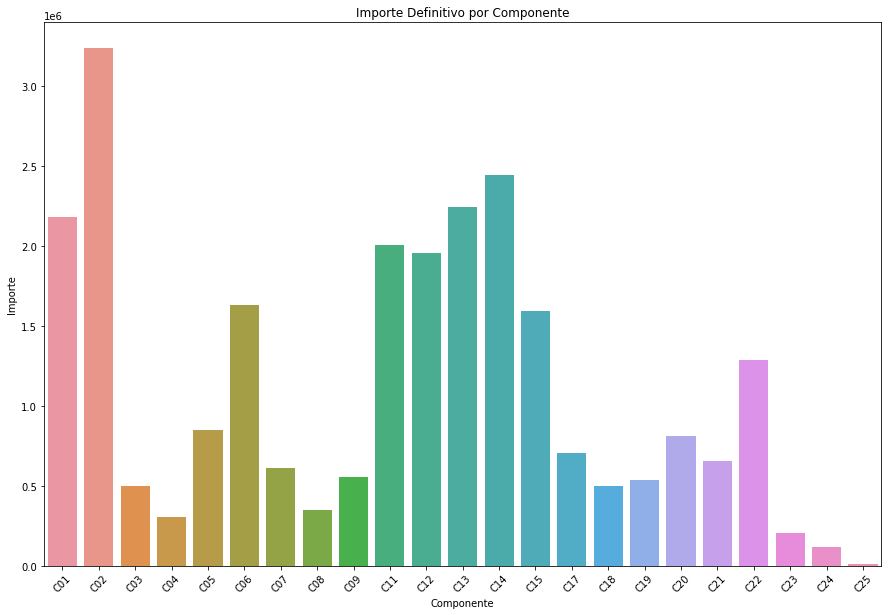

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
ImporteporComponente = totalMedida.groupby('Componente')['Definitivos'].sum()

plt.figure(figsize=(15,10))
sns.barplot(x=ImporteporComponente.index, y=ImporteporComponente)
plt.xticks(rotation= 45)
plt.xlabel('Componente')
plt.ylabel('Importe')
plt.title('Importe Definitivo por Componente')



Text(0.5, 1.0, 'Importe Autorizado por Componente')

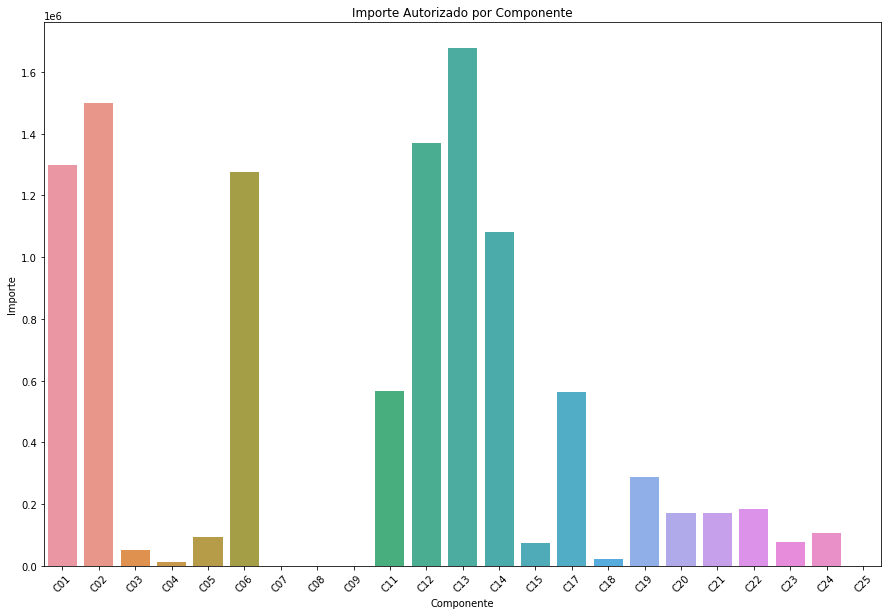

In [29]:
ImporteporComponente = totalMedida.groupby('Componente')['Autorizados'].sum()

plt.figure(figsize=(15,10))
sns.barplot(x=ImporteporComponente.index, y=ImporteporComponente)
plt.xticks(rotation= 45)
plt.xlabel('Componente')
plt.ylabel('Importe')
plt.title('Importe Autorizado por Componente')

Text(0.5, 1.0, '% Realizado por Componente')

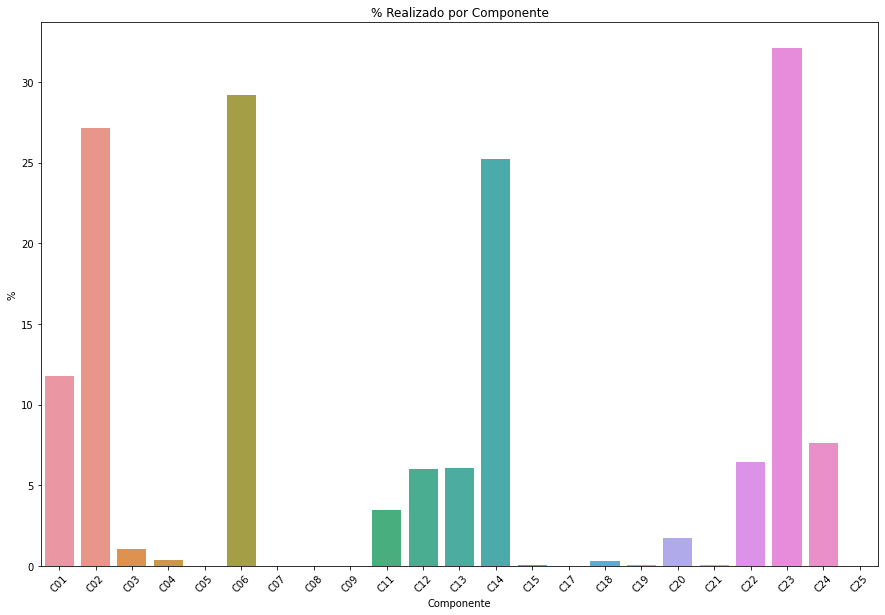

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(x=totalComp.index, y=totalComp['%'])
plt.xticks(rotation= 45)
plt.xlabel('Componente')
plt.ylabel('%')
plt.title('% Realizado por Componente')

# Datos por ministerio

In [33]:
columns_to_show = ['Definitivos','Autorizados','Comprometidos','Reconocidos','Pagados']
totalMin = totalMedida.groupby(['Ministerio'])[columns_to_show].sum().sort_values('Ministerio', ascending=True)
totalMin['Pct'] =totalMin['Reconocidos']/totalMin['Definitivos']*100
totalMin.head()

,Definitivos,Autorizados,Comprometidos,Reconocidos,Pagados,Pct
Ministerio,,,,,,
"12-ASUNTOS EXTERIORES, U. EUROPEA Y COOPERACIÓN",78776.0,66095,66095,0,0,0.000000
13-JUSTICIA,209011.0,23311,15754,483,483,0.231088
14-DEFENSA,133833.0,25162,24922,9830,9830,7.344975
15-HACIENDA Y FUNCIÓN PÚBLICA,267827.0,6976,3160,115,59,0.042938
16-INTERIOR,203818.0,24442,22942,6321,2190,3.101296


<Figure size 1080x720 with 0 Axes>

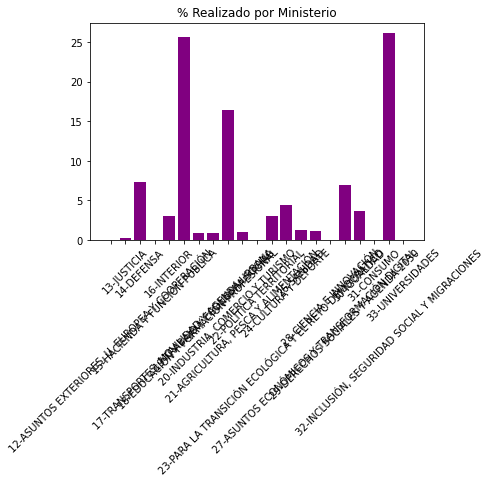

In [45]:
# Plot the data
plt.figure(figsize=(15,10))
f, ax = plt.subplots()

ax.bar(x=totalMin.index,
       height=totalMin.Pct,
       color="purple")

ax.set(title="% Realizado por Ministerio")
plt.xticks(rotation = 45) 

plt.show()

In [46]:
plt.figure(figsize=(15,10))
sns.barplot(x=totalMin.index, y=totalComp['%'])
plt.xticks(rotation= 90)
plt.xlabel('Ministerio')
plt.ylabel('%')
plt.title('% Realizado por Componente')

ValueError: Grouper and axis must be same length

<Figure size 1080x720 with 0 Axes>